# Programming Exercise 3: MNIST Data visualization

Here we'll be playing with the MNIST dataset to understand how images are processed in python

## The MNIST dataset

The dataset is available at http://yann.lecun.com/exdb/mnist/. You can also get data importing it from keras (look at https://www.askpython.com/python/examples/load-and-plot-mnist-dataset-in-python).

The digits have been size-normalized and centered in a fixed-sized image. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image by computing the center of mass of the pixels, and translating the image so as to position this point at the center of the 28x28 field.
I am saving the unzipped files downloaded from that website in <code>/MNIST database/</code> subfolder.

> I am following parts of this https://www.kaggle.com/hojjatk/read-mnist-dataset

In [1]:
# Importing the needed libraries
import os
import struct
import numpy as np
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

mnistFolder=r"C:\Users\conrado.camacho\OneDrive\Personal Projects\Coursera - Machine Learning Andrew Ng\Python code\MNIST database"
trainImages = mnistFolder + '\\train-images.idx3-ubyte'
trainLabels = mnistFolder + '\\train-labels.idx1-ubyte'
testImages = mnistFolder + '\\t10k-images.idx3-ubyte'
testLabels = mnistFolder + '\\t10k-labels.idx1-ubyte'

## Function to load the images and labels

In [2]:
# This function will open whatever labels mnist file and return the data
def load_mnist_labels(path):
    # Open the file rb means read only + binary
    with open(path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    return labels

# This function will open whatever images mnist file and return the data
# 
def load_mnist_images(path):
    # Open the file rb means read only + binary
    with open(path, 'rb') as imgpath:
        magic, n, rows, cols = struct.unpack('>IIII', imgpath.read(16))
        images_data = np.fromfile(imgpath, dtype=np.uint8)
        # with reshape with reorganize the array into n rows, 
        # where every row is the image data flat 
        images = np.reshape(images_data, (n, rows*cols))
    return images


In [3]:
# labels = load_mnist_labels(testLabels)
images = load_mnist_images(testImages)
labels = load_mnist_labels(testLabels)

In [7]:
images[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253,
       253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  1

In [9]:
images[0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

## Visualizing some examples of the digits

### Looking at the first 10 digits

<function matplotlib.pyplot.show(close=None, block=None)>

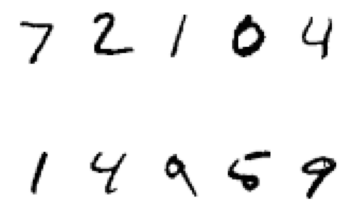

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(5,5), sharex=True, sharey=True)
ax = ax.flatten()


# Looking at the first 10 digits
for i in range(10):
    img = images[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
    ax[i].axis('off')

ax[0].set_xticks([])
ax[0].set_yticks([])
fig.subplots_adjust(wspace=0.025, hspace=0.025)
plt.tight_layout()
plt.show

## Looking at 1 example for digit

<function matplotlib.pyplot.show(close=None, block=None)>

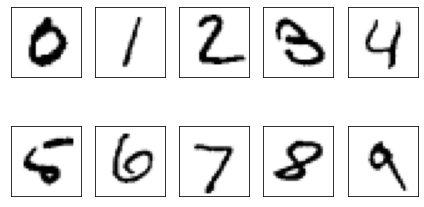

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()


# Looking at the first 10 digits
for i in range(10):
    img = images[labels == i] [0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show

## Looking at some examples of the same digit

<function matplotlib.pyplot.show(close=None, block=None)>

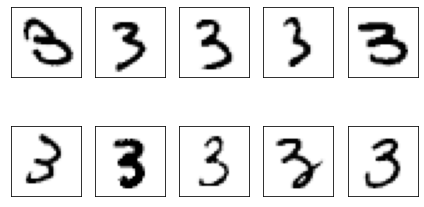

In [14]:
digit = 3

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()


# Looking at the first 10 digits
for i in range(10):
    img = images[labels == digit] [i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show